begin to train
default acc: 0.236226

origin train loss:0.693147
origin validation loss:0.693147
Gradient Decent acc: 0.784596

NAG begin
NAG acc: 0.782016

RMSProp begin
RMSProp acc: 0.761317

AdaDelta begin
AdaDelta acc: 0.752165

Adam begin
Adam acc: 0.719428



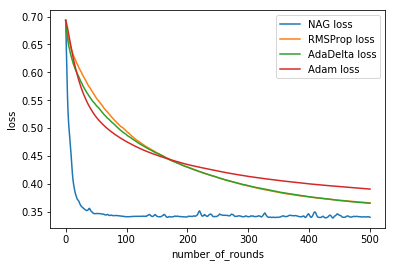

In [9]:
%matplotlib inline
# -*- coding: utf-8 -*-
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    s = 1/(1+np.exp(-z.A1))
    s = np.array(list(map(lambda x : x,s)))
    return s

def loss(X,y,w,lamb):
    h = sigmoid(X*w)
    m = y.shape[0]
    y_temp = np.array(list(map(lambda x:1 if x[0]==1 else 0,y.A)))
    J = -y_temp*np.log(h)-(1-y_temp)*np.log(1-h)
    w_reg = w
    w_reg[0]=0
    return J.sum()/m+lamb/(2*m)*((w_reg.A**2).sum())

def gradient(X,y,w,lamb):
    m = y.shape[0]
    y_temp = np.array(list(map(lambda x:1 if x[0]==1 else 0,y.A)))
    h_y = np.matrix(sigmoid(X*w)-y_temp)
    dJ = X.T*(h_y.T)/m
    w_reg = w
    w_reg[0] = 0
    g = dJ+w_reg*lamb/m
    return g
    
def gradientDecent(X,y,w,alpha,lamb,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    print("origin train loss:%f"%loss(X,y,w,lamb))
    train_loss_history.append(loss(X,y,w,lamb))
    print("origin validation loss:%f"%loss(val_x,val_y,w,lamb))
    val_loss_history.append(loss(val_x,val_y,w,lamb))
    
    for i in range(num_rounds):
        w = w - gradient(X,y,w,lamb)*alpha
        train_loss_history.append(loss(X,y,w,lamb))
        val_loss_history.append(loss(val_x,val_y,w,lamb))
        
    return w,train_loss_history,val_loss_history


def NAG(X,y,w,alpha,lamb,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,lamb))
    val_loss_history.append(loss(val_x,val_y,w,lamb))
    print("NAG begin")
    
    r = 0.9
    v = np.zeros(w.shape)
    
    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X.shape[0],size=100)))
        gdx = X[random]
        gdy = y[random]
        
        _w = w - r*v
        gt = gradient(gdx,gdy,_w,lamb)
        v = r*v + alpha*gt
        w = w - v
        train_loss_history.append(loss(X,y,w,lamb))
        val_loss_history.append(loss(val_x,val_y,w,lamb))
        
    return w,train_loss_history,val_loss_history

def RMSProp(X,y,w,alpha,lamb,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,lamb))
    val_loss_history.append(loss(val_x,val_y,w,lamb))
    print("RMSProp begin")
    
    r = 0.9
    v = np.zeros(w.shape)
    e = 1e-8
    
    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X.shape[0],size=100)))
        gdx = X[random]
        gdy = y[random]
        
        gt = gradient(gdx,gdy,w,lamb)
        gt_2 = np.matrix((gt.A)**2)
        v = r*v + (1-r)*gt_2
        w = w - 0.001/np.sqrt(v+e).A*(gt.A)
        train_loss_history.append(loss(X,y,w,lamb))
        val_loss_history.append(loss(val_x,val_y,w,lamb))
        
    return w,train_loss_history,val_loss_history

def AdaDelta(X,y,w,alpha,lamb,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,lamb))
    val_loss_history.append(loss(val_x,val_y,w,lamb))
    print("AdaDelta begin")
    
    r = 0.95
    v = np.zeros(w.shape)
    e = 1e-6
    t = np.matrix(np.zeros(w.shape))
    
    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X.shape[0],size=100)))
        gdx = X[random]
        gdy = y[random]
        
        gt = gradient(gdx,gdy,w,lamb)
        gt_2 = np.matrix((gt.A)**2)
        v = r*v + (1-r)*gt_2
        dw = -(np.sqrt(t+e).A/np.sqrt(v+e).A)*gt.A
        w = w + dw
        t = r*t+(1-r)*(t.A*t.A)
        train_loss_history.append(loss(X,y,w,lamb))
        val_loss_history.append(loss(val_x,val_y,w,lamb))
        
    return w,train_loss_history,val_loss_history

def Adam(X,y,w,alpha,lamb,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,lamb))
    val_loss_history.append(loss(val_x,val_y,w,lamb))
    print("Adam begin")
    
    r = 0.999
    v = np.zeros(w.shape)
    e = 1e-8
    m = np.zeros(w.shape)
    b1 = 0.9
    
    
    for i in range(num_rounds):
        random = list(set(np.random.randint(0,X.shape[0],size=100)))
        gdx = X[random]
        gdy = y[random]
        
        gt = gradient(gdx,gdy,w,lamb)
        gt_2 = np.matrix((gt.A)**2)
        v = r*v + (1-r)*gt_2
        m = b1*m + (1-b1)*gt.A
        alp = 0.001*np.sqrt(1-r)/(1-b1)
        w = w - alp*m/np.sqrt(v+e).A
        train_loss_history.append(loss(X,y,w,lamb))
        val_loss_history.append(loss(val_x,val_y,w,lamb))
        
    return w,train_loss_history,val_loss_history



def train(X,y,val_x,val_y):
    m = X.shape[1]
    init_w = np.matrix(np.zeros((m,1)))
    print("begin to train")
    alpha=0.1
    num_rounds=500
    lamb = 1
    print("default acc: %f"%predict(val_x,val_y,init_w))
    print("")
    
    w,train_loss_history,NAG_loss_history = gradientDecent(X,y,init_w,alpha,lamb,num_rounds,val_x,val_y)
    print("Gradient Decent acc: %f"%predict(val_x,val_y,w))
    print("")
    
    w,train_loss_history,NAG_loss_history = NAG(X,y,init_w,alpha,lamb,num_rounds,val_x,val_y)
    print("NAG acc: %f"%predict(val_x,val_y,w))
    print("")
    w,train_loss_history,RMSProp_loss_history = RMSProp(X,y,init_w,alpha,lamb,num_rounds,val_x,val_y)
    print("RMSProp acc: %f"%predict(val_x,val_y,w))
    print("")
    w,train_loss_history,AdaDelta_loss_history = AdaDelta(X,y,init_w,alpha,lamb,num_rounds,val_x,val_y)
    print("AdaDelta acc: %f"%predict(val_x,val_y,w))
    print("")
    w,train_loss_history,Adam_loss_history = Adam(X,y,init_w,alpha,lamb,num_rounds,val_x,val_y)
    print("Adam acc: %f"%predict(val_x,val_y,w))
    print("")
    plt.plot(np.arange(num_rounds+1),NAG_loss_history,label='NAG loss')
    plt.plot(np.arange(num_rounds+1),RMSProp_loss_history,label='RMSProp loss')
    plt.plot(np.arange(num_rounds+1),AdaDelta_loss_history,label='AdaDelta loss')
    plt.plot(np.arange(num_rounds+1),Adam_loss_history,label='Adam loss')
    plt.legend(loc=1)
    plt.xlabel('number_of_rounds')
    plt.ylabel('loss')
    return w
    
def predict(X,y,w):
    pred = sigmoid(X*w)
    num_p = (y==1).sum()
    num_n = (y==-1).sum()
    pred = pred/(1-pred)
    pred_y = list(map(lambda x:1 if x>num_p/num_n else -1,pred))
    acc = (y.A1==pred_y).sum()/len(y.A)
    return acc


def getData():
    X,y = datasets.load_svmlight_file('./a9a',n_features=123)
    X = np.matrix(X.toarray())
    ones = np.matrix(np.ones((X.shape[0],1)))
    train_x = np.concatenate((ones,X),axis=1)
    train_y = np.matrix(y).T
    
    X,y = datasets.load_svmlight_file('./a9a.t',n_features=123)
    X = np.matrix(X.toarray())
    ones = np.matrix(np.ones((X.shape[0],1)))
    test_x = np.concatenate((ones,X),axis=1)
    test_y = np.matrix(y).T
    return train_x,test_x,train_y,test_y
    

train_x,test_x,train_y,test_y = getData()
w = train(train_x,train_y,test_x,test_y)


# -*- coding: utf-8 -*-





### This is the Logistic Regression,which is actually a classification model rather than regression